In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "test_classification"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close'), ('optimal_v2', 'close')],
                            param_spec={},
                            optimal_threshold={'buy':0.8},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]}
                                    ],

                            )
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from BTCUSDT-1m...


In [25]:
dataset.columns

Index(['time', 'high', 'low', 'close', 'open', 'volume', 'RSI', 'optimal',
       'WILLR_close_period_3', 'WILLR_close_period_5', 'WILLR_close_period_10',
       'WILLR_close_period_30', 'CCI_close_period_3', 'CCI_close_period_5',
       'CCI_close_period_10', 'CCI_close_period_30', 'RSI_close_period_3',
       'RSI_close_period_5', 'RSI_close_period_10', 'RSI_close_period_30',
       'Momentum_close_period_3', 'Momentum_close_period_5',
       'Momentum_close_period_10', 'Momentum_close_period_30',
       'RateOfChange_close_period_3', 'RateOfChange_close_period_5',
       'RateOfChange_close_period_10', 'RateOfChange_close_period_30',
       'Momentum_RSI_period_3', 'Momentum_RSI_period_5',
       'Momentum_RSI_period_10', 'Momentum_RSI_period_30',
       'RateOfChange_RSI_period_3', 'RateOfChange_RSI_period_5',
       'RateOfChange_RSI_period_10', 'RateOfChange_RSI_period_30'],
      dtype='object')

In [24]:
features

['WILLR_close_period_30',
 'Momentum_close_period_30',
 'RSI_close_period_3',
 'RateOfChange_RSI_period_10',
 'CCI_close_period_5',
 'Momentum_RSI_period_30',
 'RateOfChange_RSI_period_30',
 'RateOfChange_close_period_3',
 'CCI_close_period_3',
 'RateOfChange_close_period_30',
 'Momentum_close_period_3',
 'RateOfChange_close_period_10',
 'Momentum_RSI_period_10',
 'WILLR_close_period_3',
 'RSI_close_period_30',
 'RSI_close_period_5',
 'Momentum_close_period_5',
 'RSI',
 'Momentum_RSI_period_3',
 'Momentum_RSI_period_5',
 'Momentum_close_period_10',
 'WILLR_close_period_5',
 'CCI_close_period_30',
 'RateOfChange_close_period_5',
 'CCI_close_period_10',
 'RateOfChange_RSI_period_5',
 'WILLR_close_period_10',
 'RateOfChange_RSI_period_3',
 'RSI_close_period_10',
 'volume']

In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,volume,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
90,4319.996912,0.048053,0.594297,0.0,0.476929,0.488858,0.498613,0.643434,0.933333,7.241379e-01,...,0.430643,0.401906,0.478606,0.503770,0.494352,0.555047,0.204404,0.181143,0.174906,0.162865
91,4319.998456,0.030719,0.594297,0.0,0.476929,0.488858,0.498774,0.643497,0.933333,7.241379e-01,...,0.430630,0.401904,0.478606,0.503770,0.494352,0.555047,0.204404,0.181143,0.174906,0.162865
92,4319.999228,0.179059,0.594297,0.0,0.476929,0.488858,0.498855,0.643529,0.933333,7.241379e-01,...,0.430624,0.402986,0.478606,0.503770,0.494352,0.570287,0.204404,0.181143,0.174906,0.167805
93,4319.999614,0.501599,0.594297,0.0,0.476929,0.488858,0.498936,0.643545,0.933333,7.241379e-01,...,0.430881,0.397691,0.478606,0.503770,0.497380,0.513006,0.204404,0.181143,0.175860,0.150353
94,4319.999807,0.019386,0.594297,0.0,0.476929,0.488858,0.498936,0.643552,0.933333,7.241379e-01,...,0.430749,0.395053,0.478606,0.503770,0.495070,0.513006,0.204404,0.181143,0.175132,0.150353
95,4319.999904,0.373933,0.594297,0.0,0.476929,0.488858,0.498936,0.643556,0.933333,7.241379e-01,...,0.430683,0.393737,0.478606,0.503770,0.495070,0.513006,0.204404,0.181143,0.175132,0.150353
96,4319.999952,0.098390,0.594297,0.0,0.476929,0.488858,0.498936,0.643558,0.933333,7.241379e-01,...,0.430650,0.393079,0.478606,0.503770,0.495070,0.513006,0.204404,0.181143,0.175132,0.150353
97,4305.684976,0.134767,0.481796,0.0,0.476610,0.487556,0.458089,0.383574,0.333333,6.137738e-10,...,0.421074,0.385935,0.338301,0.374271,0.377681,0.407380,0.156524,0.141834,0.138229,0.118886
98,4298.527488,0.000000,0.481796,0.0,0.476451,0.486905,0.437666,0.191787,0.476191,2.301587e-01,...,0.416287,0.382364,0.338301,0.374271,0.377681,0.407380,0.156524,0.141834,0.138229,0.118886
99,4294.948744,0.000000,0.481796,0.0,0.476929,0.486580,0.427454,0.125000,0.400000,3.076923e-01,...,0.413893,0.380578,0.338301,0.374271,0.377681,0.407380,0.156524,0.141834,0.138229,0.118886


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,volume,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
0,6525.878625,0.543290,0.507229,0.476621,0.486848,0.435872,0.111022,0.739740,0.351998,0.356599,...,0.429507,0.399168,0.474384,0.500749,0.501255,0.553173,0.202767,0.180100,0.177374,0.162160
1,7124.949520,5.994039,0.450903,0.476629,0.488166,0.450301,0.498285,0.353232,0.588460,0.425648,...,0.430391,0.395821,0.489766,0.514422,0.482577,0.570064,0.209272,0.185278,0.170297,0.168965
2,7065.104336,6.242017,0.442963,0.476503,0.486941,0.436382,0.137979,0.360437,0.165951,0.225673,...,0.427063,0.395488,0.441293,0.462724,0.464820,0.531841,0.188999,0.166217,0.163608,0.153842
3,10110.296561,412.689837,0.543418,0.476521,0.487356,0.452217,0.519338,1.000000,1.000000,0.953278,...,0.453752,0.413312,0.611697,0.647027,0.612850,0.741200,0.263019,0.239161,0.223465,0.254310
4,7764.284036,14.504690,0.549769,0.476634,0.487966,0.482071,0.618513,1.000000,0.849995,0.657647,...,0.434185,0.397940,0.474621,0.517409,0.524627,0.550978,0.202959,0.185646,0.185503,0.161484
5,10708.462003,20.824574,0.445875,0.476559,0.487334,0.450729,0.304012,0.484785,0.376229,0.462913,...,0.428459,0.395632,0.479322,0.488036,0.494226,0.612595,0.204715,0.175229,0.174795,0.188808
6,8338.524821,12.170180,0.518946,0.476728,0.488489,0.461934,0.452339,0.915954,0.802218,0.505316,...,0.427903,0.399612,0.489079,0.520399,0.479378,0.574920,0.208464,0.186934,0.169734,0.170137
7,11214.500093,32.762936,0.682709,0.476719,0.488159,0.482758,0.885765,0.997633,0.855285,0.737650,...,0.443984,0.416691,0.508615,0.562918,0.556927,0.667663,0.213783,0.198195,0.193800,0.200231
8,6851.140163,17.652688,0.519949,0.476647,0.487384,0.448261,0.379692,0.460992,0.223251,0.257441,...,0.427867,0.397283,0.429239,0.476519,0.452095,0.529450,0.186677,0.172225,0.160950,0.154152
9,6415.014683,31.509547,0.581219,0.476575,0.487975,0.452894,0.197388,0.999182,0.756258,0.553764,...,0.418629,0.388845,0.475728,0.515051,0.460840,0.499318,0.203407,0.184683,0.164666,0.146309


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [7]:
clf = RandomForestClassifier(random_state=69420, class_weight=class_weights, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=1)
clf.fit(trainX.drop("close", axis=1).values, trainy.values)

print(clf.score(testX.drop("close", axis=1).values, testy.values))

feature_importances = permutation_importance(clf, trainX.drop("close", axis=1).values, trainy.values, n_repeats=10, random_state=69420)

for i in range(len(feature_importances.importances_mean)):
    print('i: {}, Feature: {}, Score: {}'.format(i, trainX.drop("close", axis=1).columns[i], feature_importances.importances_mean[i]))

0.9366596275565187
i: 0, Feature: volume, Score: 0.008912116507402012
i: 1, Feature: RSI, Score: 0.0018989307034615766
i: 2, Feature: WILLR_close_period_3, Score: 0.009598740460519128
i: 3, Feature: WILLR_close_period_5, Score: 0.007743981106907838
i: 4, Feature: WILLR_close_period_10, Score: 0.029970479543416962
i: 5, Feature: WILLR_close_period_30, Score: 0.01684808991712409
i: 6, Feature: CCI_close_period_3, Score: 0.010064507664385236
i: 7, Feature: CCI_close_period_5, Score: 0.014096783363582721
i: 8, Feature: CCI_close_period_10, Score: 0.02417965931206404
i: 9, Feature: CCI_close_period_30, Score: 0.003760250158535805
i: 10, Feature: RSI_close_period_3, Score: 0.1408388183070565
i: 11, Feature: RSI_close_period_5, Score: 0.08261398176291797
i: 12, Feature: RSI_close_period_10, Score: 0.029509960420721203
i: 13, Feature: RSI_close_period_30, Score: 0.0021399050971988576
i: 14, Feature: Momentum_close_period_3, Score: 0.053895606918720376
i: 15, Feature: Momentum_close_period_5, S

In [8]:
reduced_classified_data = nu.classifyPoints(clf, testX, predict_proba=False, proba_thresh=0.7, plot_optimal=True, optimal=testy)

In [9]:
smaller_view_data = reduced_classified_data[1000:2000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

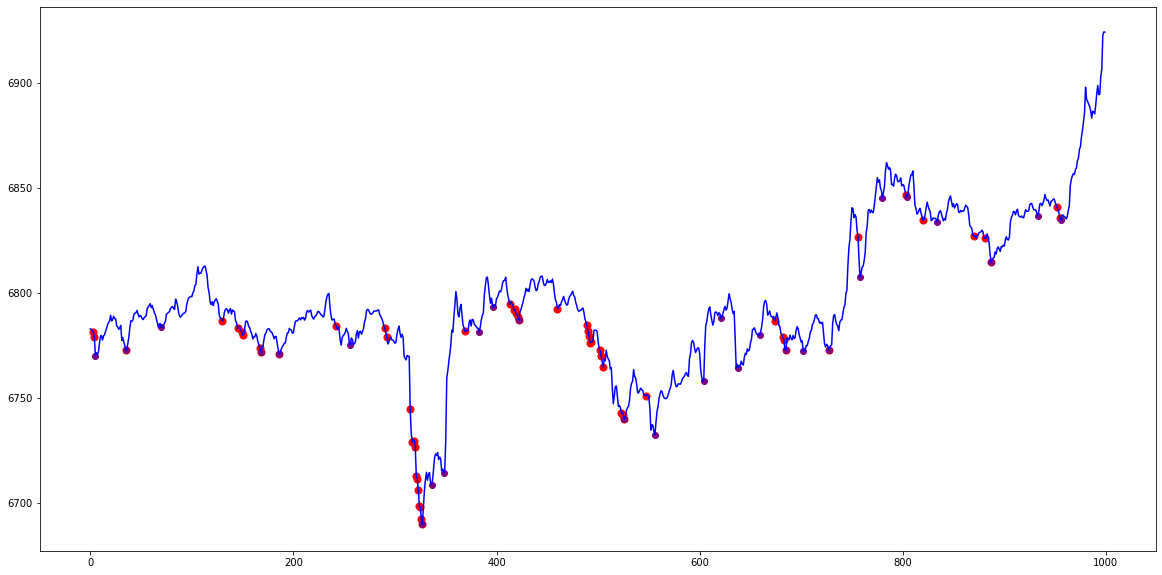

In [10]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [11]:
features.append('volume')

In [12]:
nu.exportModel(clf, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.0, is_nn=False)

In [13]:
nu.testModel(model_name)

Importing Strategies...
Generating Model Data...
Scaling Model Data...
Preprocessing Model Predictions...
Generating Algo Data...
Executing Strategy...
105553it [00:02, 43690.58it/s]
Generating Report...


TypeError: 'NoneType' object is not iterable